# Exploratory Data Analysis
This is a separate work space for the EDA, which will then be implemented into the technical report
I think the most important attributes are:
* heart_disease
* bmi
* smoking_status
* avg_glucose_level
* hypertension
* age

Can also gather data for two attributes:
* Never smoked, but what is their bmi?
    * What about age?


Gather data into a variable

In [2]:
import importlib
import os
import matplotlib.pyplot as plt

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import myEDA.utils
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils

import myEDA.plot_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

fname = os.path.join("input_data", "stroke-data-downsized.csv")
table = mysklearn.mypytable.MyPyTable().load_from_file(fname)

fname = os.path.join("input_data", "stroke-data-cleaned-numeric.csv")
numeric_table = mysklearn.mypytable.MyPyTable().load_from_file(fname)

## Multiple Frequency Diagrams

#### Smoking Status

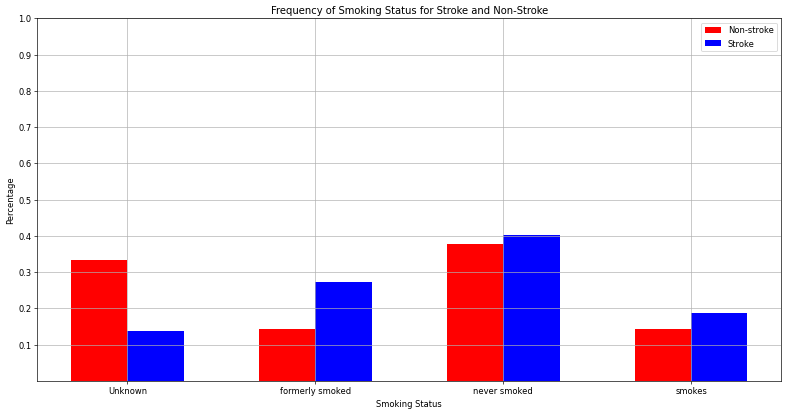

This table shows that there are more occurences of a stroke in people who have a history of smoking and who currently smoke. We can see this from the difference in height of the bars under the 'smokes' and 'formerly smoked' column - the blue bar (has had a stroke) is greater than the red bar.


In [44]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in table.data: # uncleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

smoking_non_stroke_values, smoking_non_stroke_count = eda_utils.get_frequencies(non_stroke, table.column_names, "smoking_status")
#print(smoking_non_stroke_values)
#print(smoking_non_stroke_count)
smoking_stroke_values, smoking_stroke_count = eda_utils.get_frequencies(stroke, table.column_names, "smoking_status")
#print(smoking_stroke_values)
#print(smoking_stroke_count)

for i in range(len(smoking_non_stroke_count)):
    value = smoking_non_stroke_count[i]
    smoking_non_stroke_count[i] = value / len(non_stroke)
#print(smoking_non_stroke_count)
for i in range(len(smoking_stroke_count)):
    value = smoking_stroke_count[i]
    smoking_stroke_count[i] = value / len(stroke)
#print(smoking_stroke_count)

plt.figure(figsize=(16, 8), dpi=60) # start of multiple frequency plot
ax = plt.gca()
b1 = ax.bar([1,2,3,4], smoking_non_stroke_count, 0.3, color="r")
b2 = ax.bar([1.3,2.3,3.3,4.3], smoking_stroke_count, 0.3, color="b")
ax.set_xticks([1.15, 2.15, 3.15, 4.15])
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_xticklabels(smoking_stroke_values)
ax.legend((b1[0], b2[0]), ("Non-stroke", "Stroke"), loc=1)
ax.set_title("Frequency of Smoking Status for Stroke and Non-Stroke")
ax.set_xlabel("Smoking Status")
ax.set_ylabel("Percentage")
plt.grid(True)
plt.show()

print("This table shows that there are more occurences of a stroke in people who have a history of smoking and who currently smoke.", end=" ")
print("We can see this from the difference in height of the bars under the 'smokes' and 'formerly smoked' column - the blue bar", end=" ")
print("(has had a stroke) is greater than the red bar.")

#### BMI

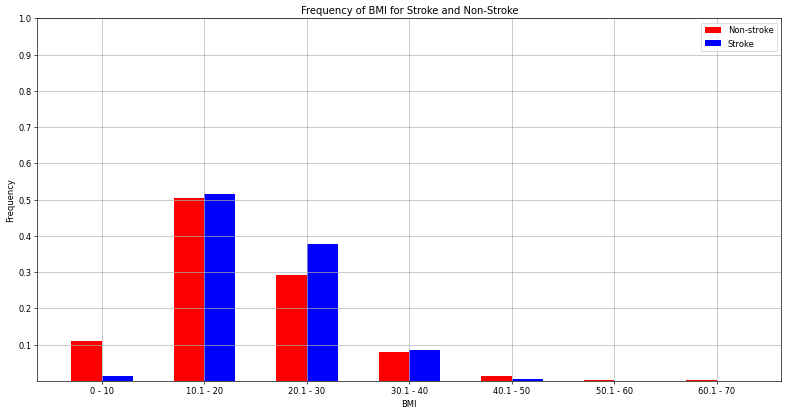

This table shows the relationship between the BMI for people who have had a stroke and people who have not. We can see that in the third column, stroke is much mroe frequent than non-stroke Which tells us that stroke is more frequent in higher BMI's


In [46]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in numeric_table.data: # for cleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

bmi_non_stroke_values, bmi_non_stroke_count = eda_utils.get_frequencies(non_stroke, numeric_table.column_names, "bmi")
#print(bmi_non_stroke_values)
#print(bmi_non_stroke_count)
bmi_stroke_values, bmi_stroke_count = eda_utils.get_frequencies(stroke, numeric_table.column_names, "bmi")
#print(bmi_stroke_values)
#print(bmi_stroke_count)

while len(bmi_non_stroke_count) > len(bmi_stroke_count):
    bmi_stroke_count.append(0.0)
#print(bmi_stroke_count)

for i in range(len(bmi_non_stroke_count)):
    value = bmi_non_stroke_count[i]
    bmi_non_stroke_count[i] = value / len(non_stroke)
#print(bmi_non_stroke_count)
for i in range(len(bmi_stroke_count)):
    value = bmi_stroke_count[i]
    bmi_stroke_count[i] = value / len(stroke)
#print(bmi_stroke_count)

plt.figure(figsize=(16, 8), dpi=60) # start of multiple frequency plot
ax = plt.gca()
b1 = ax.bar([1,2,3,4,5,6,7], bmi_non_stroke_count, 0.3, color="r")
b2 = ax.bar([1.3,2.3,3.3,4.3,5.3,6.3,7.3], bmi_stroke_count, 0.3, color="b")
ax.set_xticks([1.15, 2.15, 3.15, 4.15,5.15,6.15,7.15])
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_xticklabels(["0 - 10","10.1 - 20","20.1 - 30", "30.1 - 40", "40.1 - 50", "50.1 - 60", "60.1 - 70"])
ax.legend((b1[0], b2[0]), ("Non-stroke", "Stroke"), loc=1)
ax.set_title("Frequency of BMI for Stroke and Non-Stroke")
ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")
plt.grid(True)
plt.show()

print("This table shows the relationship between the BMI for people who have had a stroke and people who have not.", end=" ")
print("We can see that in the third column, stroke is much mroe frequent than non-stroke", end=" ")
print("Which tells us that stroke is more frequent in higher BMI's")


#### Heart Disease

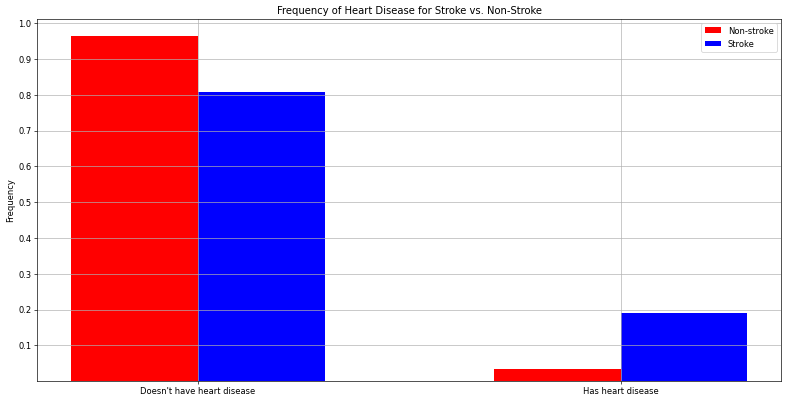

This figure of comparing the people who have and don't have heart disease which the relationship of if they, or if they didn't have a stroke. We can see that there are more people who do not have heart disease, that also have not had a stroke. On the other hand, we can see that in people who do have heart diesease, stroke is more common.


In [48]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in table.data: # uncleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

heart_non_stroke_values, heart_non_stroke_count = eda_utils.get_frequencies(non_stroke, table.column_names, "heart_disease")
#print(heart_non_stroke_values)
#print(heart_non_stroke_count)
heart_stroke_values, heart_stroke_count = eda_utils.get_frequencies(stroke, table.column_names, "heart_disease")
#print(heart_stroke_values)
#print(heart_stroke_count)

for i in range(len(heart_non_stroke_count)):
    value = heart_non_stroke_count[i]
    heart_non_stroke_count[i] = value / len(non_stroke)
#print(heart_non_stroke_count)
for i in range(len(heart_stroke_count)):
    value = heart_stroke_count[i]
    heart_stroke_count[i] = value / len(stroke)
#print(heart_stroke_count)

heart_labels = []
for value in heart_stroke_values:
    if value == 0.0:
        heart_labels.append("Doesn't have heart disease")
    else:
        heart_labels.append("Has heart disease")

plt.figure(figsize=(16, 8), dpi=60) # start of multiple frequency plot
ax = plt.gca()
b1 = ax.bar([1,2], heart_non_stroke_count, 0.3, color="r")
b2 = ax.bar([1.3,2.3], heart_stroke_count, 0.3, color="b")
ax.set_xticks([1.15, 2.15])
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_xticklabels(heart_labels)
ax.legend((b1[0], b2[0]), ("Non-stroke", "Stroke"), loc=1)
ax.set_title("Frequency of Heart Disease for Stroke vs. Non-Stroke")
#ax.set_xlabel("Heart Disease")
ax.set_ylabel("Frequency")
plt.grid(True)
plt.show()

print("This figure of comparing the people who have and don't have heart disease which the relationship of", end=" ")
print("if they, or if they didn't have a stroke. We can see that there are more people who do not have heart disease,", end=" ")
print("that also have not had a stroke. On the other hand, we can see that in people who do have heart diesease,", end=" ")
print("stroke is more common.")

## Box and Whisker Plots

#### Average Glucose Levels

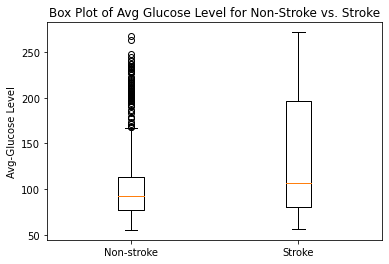

This box plot is comparing the average glucose level of people who have had a stroke with people who have not had a stroke We can see from the graph, that for people who have had a stroke, there is a much larger range of glucose levels. That tells us that there are more people with a higher glucose levels who have had a stroke than who haven't.


In [49]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in table.data: # uncleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

glucose_non_stroke_values, glucose_non_stroke_count = eda_utils.get_frequencies(non_stroke, table.column_names, "avg_glucose_level")
#print(glucose_non_stroke_values)
#print(glucose_non_stroke_count)
glucose_stroke_values, glucose_stroke_count = eda_utils.get_frequencies(stroke, table.column_names, "avg_glucose_level")
#print(glucose_stroke_values)
#print(glucose_stroke_count)

myEDA.plot_utils.box_plot([glucose_non_stroke_values, glucose_stroke_values], \
    ["Non-stroke", "Stroke"], "Box Plot of Avg Glucose Level for Non-Stroke vs. Stroke", None, "Avg-Glucose Level")

print("This box plot is comparing the average glucose level of people who have had a stroke with people who have not had a stroke", end=" ")
print("We can see from the graph, that for people who have had a stroke, there is a much larger range of glucose levels.", end=" ")
print("That tells us that there are more people with a higher glucose levels who have had a stroke than who haven't.")

#### Age

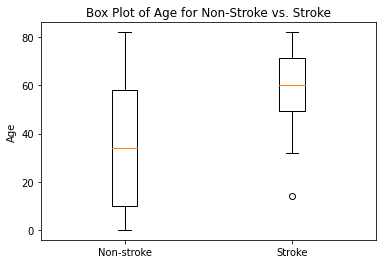

This box plot is showing of the range of people's age who have and haven't had a stroke. We can clearly see that the average age in people who have had a stroke is much higher than the average of people who haven't had a stroke.


In [50]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in table.data: # for uncleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

age_non_stroke_values, age_non_stroke_count = eda_utils.get_frequencies(non_stroke, table.column_names, "age")
#print(bmi_non_stroke_values)
#print(bmi_non_stroke_count)
age_stroke_values, age_stroke_count = eda_utils.get_frequencies(stroke, table.column_names, "age")
#print(bmi_stroke_values)
#print(bmi_stroke_count)

myEDA.plot_utils.box_plot([age_non_stroke_values, age_stroke_values], \
    ["Non-stroke", "Stroke"], "Box Plot of Age for Non-Stroke vs. Stroke", None, "Age")

print("This box plot is showing of the range of people's age who have and haven't had a stroke. We can clearly see that the", end=" ")
print("average age in people who have had a stroke is much higher than the average of people who haven't had a stroke.")